In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

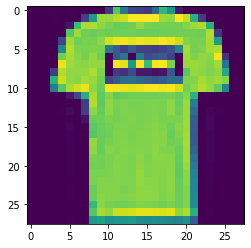

In [4]:
plt.imshow(x_train[1])

In [5]:
y_train[1]

0

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
class_names[y_train[0]]

'Ankle boot'

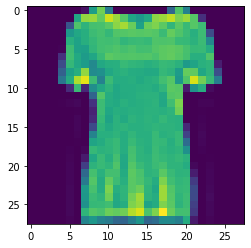

In [8]:
plt.imshow(x_train[10])

In [9]:
y_train[10]

0

# Data Normalize

In [10]:
x_train = x_train/255.
x_test  = x_test/255.

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [12]:
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [13]:
print(x_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(y_train.shape)

(55000, 28, 28)
(5000, 28, 28)
(5000,)
(55000,)


# Model Create

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import plot_model


In [15]:
import pydot

In [16]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=300, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=100, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=10, kernel_initializer='he_uniform', activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


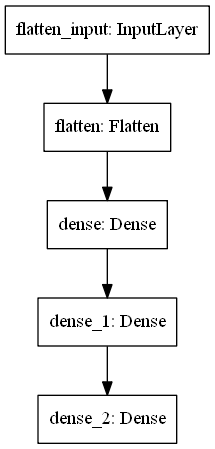

In [18]:
import pydot
plot_model(model)

In [19]:
weight, bais = model.layers[1].get_weights()

In [20]:
weight.shape

(784, 300)

In [21]:
weight

array([[ 0.07061284,  0.03687724,  0.04383881, ..., -0.03610064,
        -0.01610468, -0.01599941],
       [ 0.05743409, -0.05118099, -0.00939952, ..., -0.04572247,
        -0.08230761,  0.00962937],
       [ 0.07249089, -0.03458611, -0.03485775, ..., -0.02931063,
         0.05761812,  0.07458775],
       ...,
       [ 0.04787884,  0.0444826 ,  0.01099657, ...,  0.0167401 ,
        -0.00522655,  0.00498229],
       [-0.07570619, -0.02107701,  0.07270869, ...,  0.07375707,
         0.07896214,  0.03910398],
       [-0.07616755,  0.02111881, -0.08581004, ...,  0.04887236,
         0.0053316 ,  0.08317401]], dtype=float32)

In [22]:
bais.shape

(300,)

In [23]:
bais

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Train model 

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics = ['accuracy'])

In [26]:
model_history = model.fit(x_train,y_train, epochs=40, validation_data=(x_valid,y_valid))

Epoch 1/40
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9399 - accuracy: 0.6912 - val_loss: 0.4918 - val_accuracy: 0.8360
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4897 - accuracy: 0.8318 - val_loss: 0.4688 - val_accuracy: 0.8428
Epoch 3/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4493 - accuracy: 0.8433 - val_loss: 0.4108 - val_accuracy: 0.8602
Epoch 4/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4133 - accuracy: 0.8539 - val_loss: 0.3923 - val_accuracy: 0.8682
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3892 - accuracy: 0.8631 - val_loss: 0.3774 - val_accuracy: 0.8704
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3789 - accuracy: 0.8670 - val_loss: 0.3816 - val_accuracy: 0.8634
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3618 - accuracy: 0.8737 - val_loss: 0.3579 - val_accuracy

In [27]:
model_history.params

{'verbose': 1, 'epochs': 40, 'steps': 1719}

In [28]:
model_history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [29]:
model_history.history

{'loss': [0.6892237663269043,
  0.4806155860424042,
  0.43661701679229736,
  0.41025710105895996,
  0.3912814259529114,
  0.37445011734962463,
  0.3611578941345215,
  0.3499325215816498,
  0.3389259874820709,
  0.329089879989624,
  0.32020503282546997,
  0.31261879205703735,
  0.30527758598327637,
  0.29935216903686523,
  0.29297396540641785,
  0.2864806056022644,
  0.2802676260471344,
  0.2750821113586426,
  0.27101564407348633,
  0.26439139246940613,
  0.25986188650131226,
  0.2549947500228882,
  0.2501509189605713,
  0.24567703902721405,
  0.2420385628938675,
  0.2379937320947647,
  0.2338220179080963,
  0.22957804799079895,
  0.2261398732662201,
  0.22173458337783813,
  0.21937547624111176,
  0.21533338725566864,
  0.21208646893501282,
  0.20867933332920074,
  0.20485171675682068,
  0.2013860046863556,
  0.199246346950531,
  0.1958410143852234,
  0.19314450025558472,
  0.18851514160633087],
 'accuracy': [0.7706000208854675,
  0.8330909013748169,
  0.8474181890487671,
  0.8552727103

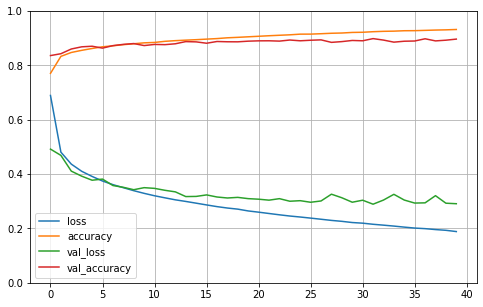

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluating performance and Predicting using Keras

In [31]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8896


[0.31976333260536194, 0.8895999789237976]

In [32]:
model.evaluate(x_train,y_train)

1719/1719 [==============================] - 4s 3ms/step - loss: 0.1755 - accuracy: 0.9395


[0.1755237877368927, 0.9394545555114746]

In [33]:
x_test 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [34]:
x_new = x_test[:3]

In [35]:
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [36]:
y_proda = model.predict(x_new)
y_proda.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_pred = model.predict_classes(x_new)

C:\Anaconda\envs\r-base\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


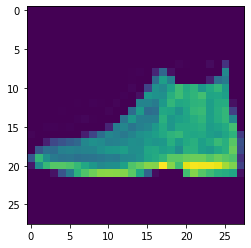

In [40]:

print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


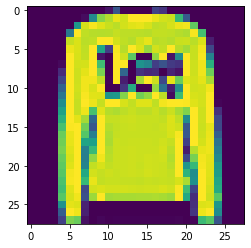

In [41]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


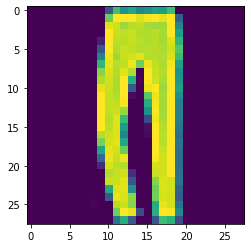

In [42]:
print(plt.imshow(x_test[2]))